0    724
1    791
2    988
3    741
4    773
Name: length, dtype: int64


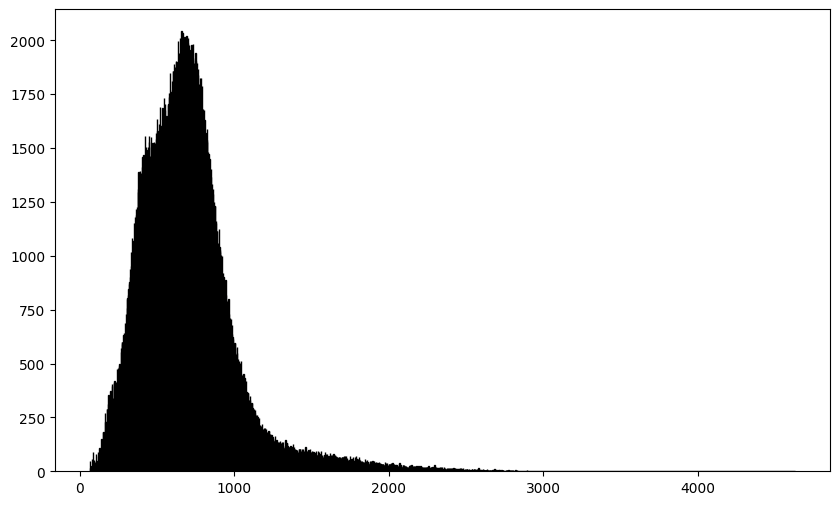

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mac_dataset.csv')

df['length'] = df['transcript'].apply(len)
print(df['length'].head())

plt.figure(figsize=(10,6))
plt.hist(df['length'], bins=3000, edgecolor='black')
plt.show()

In [12]:
import pandas as pd

df = pd.read_csv('mac_dataset.csv', usecols=['transcript'])

filtered_df = df[df['transcript'].apply(len) > 1535]

print(filtered_df.iloc[0]['transcript'])

[White "Magnus Carlsen"]
[Black "Stockfish"]

1.e4 c5 2.Nf3 Nc6 3.d4 cxd4 4.Nxd4 Nf6 5.Nc3 e5 6.Ndb5 d6 7.Bg5 a6 8.Na3 b5 9.Nd5 Be7 10.Bxf6 Bxf6 11.c3 Bg5 12.Nc2 O-O 13.h4 Bh6 14.g4 Bf4 15.Qf3 Rb8 16.a3 a5 17.Be2 Be6 18.Nxf4 exf4 19.Qxf4 b4 20.axb4 axb4 21.Nd4 Qd7 22.h5 h6 23.O-O Rfc8 24.Rfc1 Qd8 25.Nxc6 Rxc6 26.c4 b3 27.e5 dxe5 28.Qxe5 Rbc8 29.Qf4 Qg5 30.Qxg5 hxg5 31.Rc3 Rd6 32.Rxb3 Rd2 33.Bf1 Bxg4 34.Rc1 Be6 35.Rb5 Rd4 36.Rxg5 Bxc4 37.h6 g6 38.b3 Ba6 39.Rxc8+ Bxc8 40.Bc4 Bf5 41.Rg3 Kh7 42.Bxf7 Kxh6 43.Kf1 Rd2 44.Bg8 Kg7 45.Bc4 Kf6 46.Re3 Kg5 47.Ke1 Rb2 48.Re2 Rb1+ 49.Kd2 Kf4 50.Kc3 Rc1+ 51.Kd4 g5 52.Rd2 Bd7 53.b4 g4 54.Kd5 Kf3 55.Kd4 Kf4 56.Rb2 Rd1+ 57.Kc5 Rc1 58.Kd6 Ba4 59.Bb3 Bb5 60.Be6 Rc6+ 61.Kd5 Rc1 62.Kd4 Kf3 63.Bd5+ Kf4 64.Be6 Kf3 65.Ra2 Bf1 66.Bd5+ Kf4 67.Rb2 Bb5 68.Bb3 Rc6 69.Ra2 Bf1 70.Rb2 Bb5 71.Bd1 Rf6 72.Kc5 Rf5+ 73.Kb6 Be8 74.Be2 Rf8 75.Kc5 Ba4 76.Kd6 Rd8+ 77.Kc7 Rd5 78.b5 Bxb5 79.Bxb5 Rd4 80.Rb3 Rd2 81.Rb4+ Kf3 82.Bc6+ Kxf2 83.Rxg4 Ke2 84.Bd5 Kf2 85.Kd6 Re2 86.Be4 Ke3 

In [13]:
print(len(df))
print(len(filtered_df))
print(len(filtered_df)/len(df))

614679
18316
0.0297976667496368


In [4]:
import pandas as pd

df = pd.read_csv('mac_dataset.csv')


# Assuming df is your DataFrame
# Step 1: Calculate length of each transcript
df['transcript_length'] = df['transcript'].str.len()

# Step 2: Group by player_two
grouped = df.groupby('player_two')

# Step 3: Analyze the correlation
# For example, calculate the mean transcript length for each player
mean_lengths = grouped['transcript_length'].mean()

# Step 4: Filter and count
# Count how many transcripts are longer than 300 characters for each player
count_long_transcripts = df[df['transcript_length'] > 400].groupby('player_two').size()

# Display the results
print("Mean Transcript Lengths:\n", mean_lengths)
print("\nCounts of Transcripts Longer Than 300 Characters:\n", count_long_transcripts)


Mean Transcript Lengths:
 player_two
Stockfish -1    321.266825
Stockfish -2    204.257204
Stockfish 0     360.206707
Stockfish 1     374.660597
Stockfish 10    721.540814
Stockfish 11    736.374742
Stockfish 12    749.063102
Stockfish 13    759.048886
Stockfish 14    766.285658
Stockfish 15    775.694055
Stockfish 16    784.655711
Stockfish 17    794.765283
Stockfish 18    798.777680
Stockfish 19    805.433313
Stockfish 2     392.305060
Stockfish 20    947.776260
Stockfish 3     415.573167
Stockfish 4     438.840637
Stockfish 5     473.831681
Stockfish 6     530.176390
Stockfish 7     611.225438
Stockfish 8     667.927670
Stockfish 9     705.639317
Name: transcript_length, dtype: float64

Counts of Transcripts Longer Than 300 Characters:
 player_two
Stockfish -1     2351
Stockfish -2       22
Stockfish 0      4360
Stockfish 1      5302
Stockfish 10    18794
Stockfish 11    20207
Stockfish 12    22626
Stockfish 13    24800
Stockfish 14    27023
Stockfish 15    31830
Stockfish 16    354

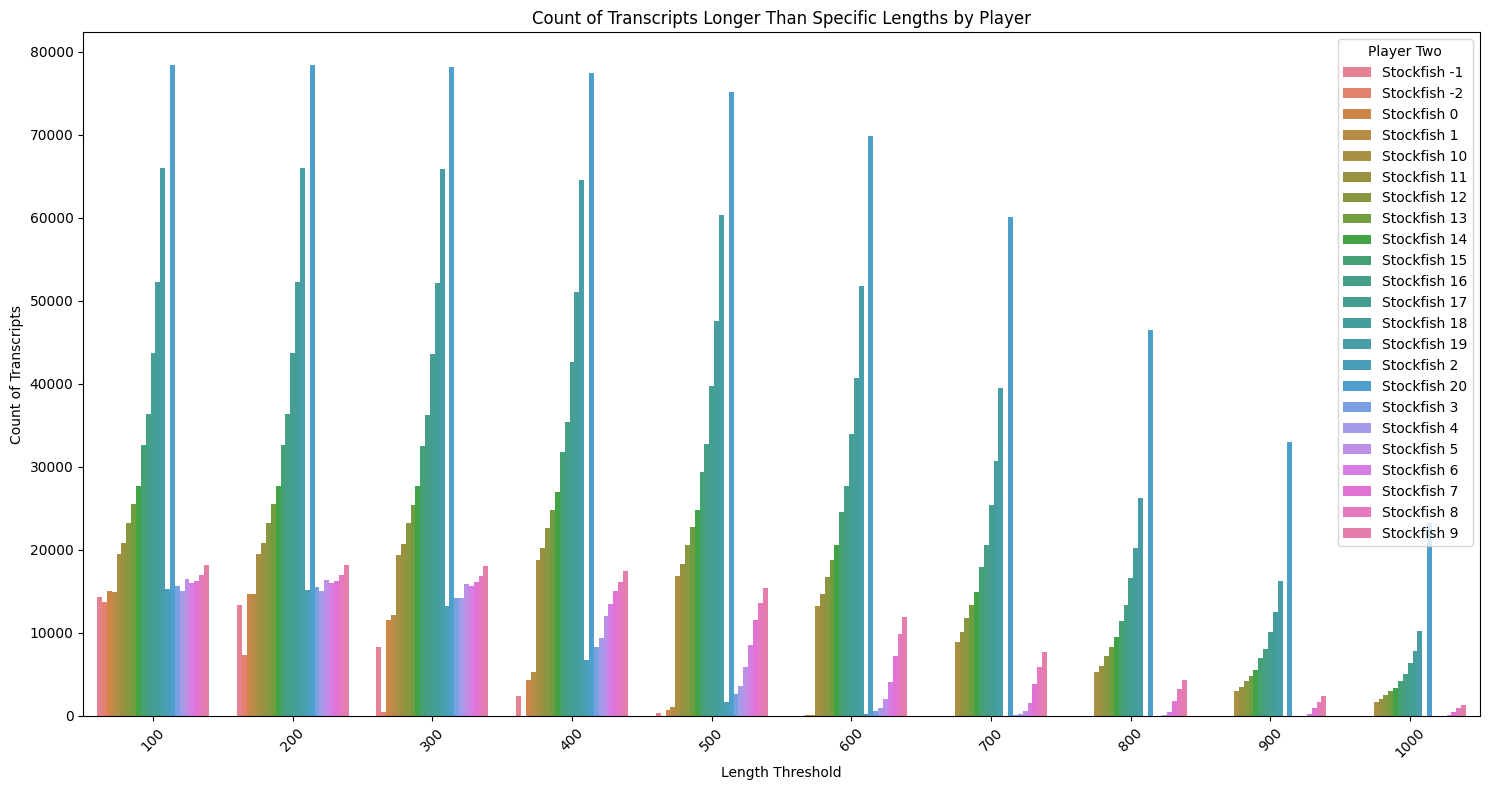

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df['transcript_length'] = df['transcript'].str.len()

# Define the length thresholds
length_thresholds = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Function to count transcripts
def count_transcripts_by_length(group, lengths):
    counts = {length: group[group['transcript_length'] > length].shape[0] for length in lengths}
    return pd.Series(counts)

# Apply function and reset index for plotting
length_counts = df.groupby('player_two').apply(count_transcripts_by_length, lengths=length_thresholds).reset_index()

# Melt the DataFrame for plotting
plot_data = length_counts.melt(id_vars='player_two', var_name='Length Threshold', value_name='Count')

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='Length Threshold', y='Count', hue='player_two', data=plot_data)
plt.title('Count of Transcripts Longer Than Specific Lengths by Player')
plt.xlabel('Length Threshold')
plt.ylabel('Count of Transcripts')
plt.xticks(rotation=45)
plt.legend(title='Player Two', loc='upper right')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

df = pd.read_csv('mac_dataset.csv')


# Assuming df is your DataFrame
# Step 1: Calculate length of each transcript
df['transcript_length'] = df['transcript'].str.len()

# Filter the DataFrame for transcripts longer than 400 characters
filtered_df = df[df['transcript_length'] > 400]

# Group by 'player_two' and take the first 3000 (or less) transcripts from each group
selected_transcripts = filtered_df.groupby('player_two').apply(lambda x: x.head(3000)).reset_index(drop=True)

print(selected_transcripts.describe())

selected_transcripts.to_csv('3kskill_dataset.csv', index=False)


       player_one_time  player_two_time  player_one_illegal_moves  \
count     65373.000000     65373.000000                   65373.0   
mean          0.014954         0.014954                       0.0   
std           0.005022         0.005022                       0.0   
min           0.010000         0.010000                       0.0   
25%           0.010000         0.010000                       0.0   
50%           0.010000         0.010000                       0.0   
75%           0.020000         0.020000                       0.0   
max           0.050000         0.050000                       0.0   

       player_two_illegal_moves  number_of_moves    time_taken  \
count                   65373.0     65373.000000  65373.000000   
mean                        0.0        56.937084      1.861235   
std                         0.0        24.342210      1.232992   
min                         0.0        32.000000      0.294247   
25%                         0.0        40.000000

In [7]:
count_long_transcripts = selected_transcripts[selected_transcripts['transcript_length'] > 400].groupby('player_two').size()
print(count_long_transcripts)

player_two
Stockfish -1    2351
Stockfish -2      22
Stockfish 0     3000
Stockfish 1     3000
Stockfish 10    3000
Stockfish 11    3000
Stockfish 12    3000
Stockfish 13    3000
Stockfish 14    3000
Stockfish 15    3000
Stockfish 16    3000
Stockfish 17    3000
Stockfish 18    3000
Stockfish 19    3000
Stockfish 2     3000
Stockfish 20    3000
Stockfish 3     3000
Stockfish 4     3000
Stockfish 5     3000
Stockfish 6     3000
Stockfish 7     3000
Stockfish 8     3000
Stockfish 9     3000
dtype: int64
